In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [25]:
Nt = 100
Nx = 100
Ny = 100

x = np.linspace(0,1,Nx)
y = np.linspace(0,1,Nx)
t = np.linspace(0,1,Nt)

deltax = 0.2#x[1] - x[0]
deltay = 0.2#y[1] - y[0]
deltat = 0.1#t[1] - t[0]

k = 1#0.0075

lambda_ = (k*deltat)/deltax**2
mu_ = (k*deltat)/deltay**2

print(lambda_,mu_)

2.4999999999999996 2.4999999999999996


In [26]:
def Ti(x,y,t):
    return np.sin(np.pi*(x+y))

In [27]:
def InitT():
    
    T = np.zeros((Nt,Nx,Ny))
    
    T[0,:,:] = Ti(x,y,t)
    T[:,0,:] = 0.#np.exp(-2*t*np.pi**(2))*np.sin(np.pi*(x))
    T[:,:,-1] = 0. #np.exp(-2*t*np.pi**(2))*np.sin(np.pi*(1+y))
    
    
    return T

In [28]:
T = InitT()
#print(T[0,:,:])

In [33]:
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        
        #T[l,0,:] = np.sin(20*t[l])
        
        for i in range(1,len(x)-2):
            for j in range(1,len(y)-2):
                T[l,i,j] = (1-2*lambda_-2*mu_)*T[l-1,i,j] + \
                lambda_*(T[l-1,i+1,j] + T[l-1,i-1,j]) + \
                mu_*(T[l-1,i,j+1] + T[l-1,i,j-1])

In [34]:
GetSolution()

100%|██████████████████████████████████████████████████████████████████████████████████| 99/99 [00:03<00:00, 31.86it/s]


<IPython.core.display.Javascript object>


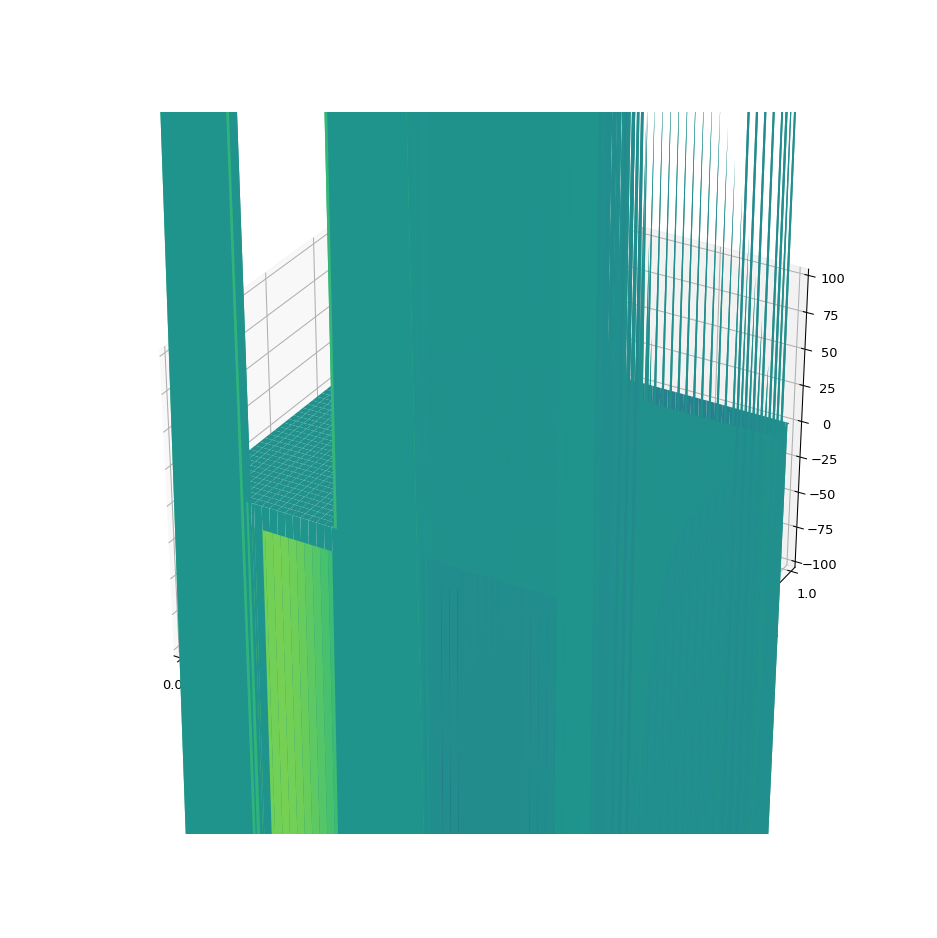

In [35]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    
    ax.set_xlim3d(0,1)
    ax.set_ylim3d(0,1)
    ax.set_zlim3d(-100,100)
1
def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,T[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)